In [1]:
import os
os.chdir('../')

In [2]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *

Loading imports


In [3]:
torch.cuda.set_device(3)

## Load Model

In [4]:
name = 'baseline_any_xresnet18_updated_mean_std'

In [5]:
dbch = get_data(512, 128, splits=Meta.splits_any)
learn = get_learner(dbch, xresnet18)

In [6]:
learn.model

Sequential(
  (0): Sequential(
    (0): ConvLayer(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): ConvLayer(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): ConvLayer(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): ResBlock(
        (convs): Sequential(
          (0): ConvLayer(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): Batch

## Training

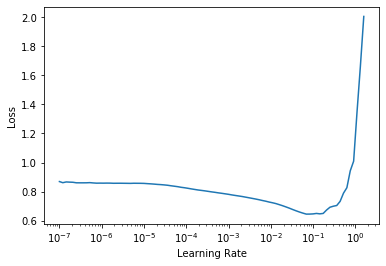

In [9]:
learn.lr_find()

In [6]:
do_fit(learn, 20, 4e-2)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.262805,0.286468,0.882572,0.795842,02:38
1,0.229392,0.286942,0.903646,0.804052,02:36
2,0.213851,0.246635,0.914492,0.839041,02:40
3,0.206412,0.229167,0.912947,0.843173,03:00
4,0.200884,0.228451,0.920187,0.846590,03:01
5,0.193546,0.196798,0.930129,0.872414,02:52
6,0.190736,0.194262,0.929232,0.878427,02:41
7,0.184746,0.195077,0.930535,0.875487,02:39
8,0.182846,0.187551,0.933077,0.878559,02:40
9,0.179572,0.191743,0.932817,0.878427,02:39


In [7]:
learn.dbunch = get_data(512, 256)
do_fit(learn, 20, 4e-3)
learn.save(f'runs/{name}-2')

In [ ]:
learn.dbunch = get_data(512, 256, full_ds=True)
do_fit(learn, 2, 5e-4)
learn.save(f'runs/{name}-3-full')

## Submission

In [6]:
learn.load(f'runs/{name}-3-full')
sub_fn = f'subm/{name}'

In [8]:
learn.dbunch = get_test_data(Meta.df_tst, bs=512, sz=None, tst_dir='tst_jpg256')

In [9]:
ob = learn.dbunch.one_batch()

In [10]:
preds,targs = learn.get_preds()

In [11]:
pred_csv = submission(Meta.df_tst, preds, fn=sub_fn)

In [12]:
api.competition_submit(f'{sub_fn}.csv', name, 'rsna-intracranial-hemorrhage-detection')

100%|██████████| 26.0M/26.0M [00:02<00:00, 10.0MB/s]


Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [13]:
api.competitions_submissions_list('rsna-intracranial-hemorrhage-detection')[0]

{'ref': 13768428,
 'totalBytes': 27277209,
 'date': '2019-12-12T18:13:15.577Z',
 'description': 'baseline_any_xresnet18',
 'errorDescription': None,
 'fileName': 'baseline_any_xresnet18.csv',
 'publicScore': '0.78783',
 'privateScore': '0.07677',
 'status': 'complete',
 'submittedBy': 'Andrew Shaw',
 'submittedByRef': 'bearpelican',
 'teamName': 'Andrew Shaw',
 'type': 'standard',
 'url': 'https://www.kaggle.com/submissions/13768428/13768428.raw'}